In [ ]:
# import os
# path = '/content/drive/MyDrive/ML'
# os.listdir(path)

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import cv2
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import pickle


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# #define relative path to dataset
# path_train = '/content/drive/MyDrive/ML/sign_mnist_train.csv'
# path_test = '/content/drive/MyDrive/ML/sign_mnist_test.csv'

# #define image resolution 
# res = (28,28)

In [4]:
#opening pickle file of augmented added data
with open('/content/drive/Shareddrives/SignLanguageData/combined_augmented_data_v3.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

In [5]:
#printing shapes 
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (109820, 28, 28)
y_train Shape: (109820,)
X_test Shape: (28688, 28, 28)
y_test Shape: (28688,)


In [6]:

#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

In [7]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(np.unique(y_train.astype(int))))
#dictionary of labels 
labels = dict(zip(numbers,letters))

In [8]:
# Reshape the data to (num_samples, 784)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train
y_test = y_test
# Print the shapes of the augmented data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (109820, 784)
y_train shape: (109820,)
X_test shape: (28688, 784)
y_test shape: (28688,)


In [10]:
# Normalizing the data
X_train = X_train/255
X_test = X_test/255

### SVD Implementation

In [11]:
from sklearn.decomposition import TruncatedSVD
n_components = 10
svd = TruncatedSVD(n_components, n_iter=7, random_state=42)

# Build the pipeline
pipe = Pipeline([('reducer', svd)])

In [12]:
# Fit the pipeline to X_train_sc and transform the data
X_train_svd = pipe.fit_transform(X_train)

In [13]:
# calculate the explained variance ratio for each component
explained_variance_ratio = svd.explained_variance_ratio_
explained_variance_ratio

array([0.57835189, 0.06125901, 0.04848325, 0.03327317, 0.02312323,
       0.01869508, 0.01759625, 0.01545683, 0.01315876, 0.01101536])

In [14]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_variance_ratio

array([0.57835189, 0.63961091, 0.68809416, 0.72136733, 0.74449056,
       0.76318564, 0.78078189, 0.79623872, 0.80939748, 0.82041284])

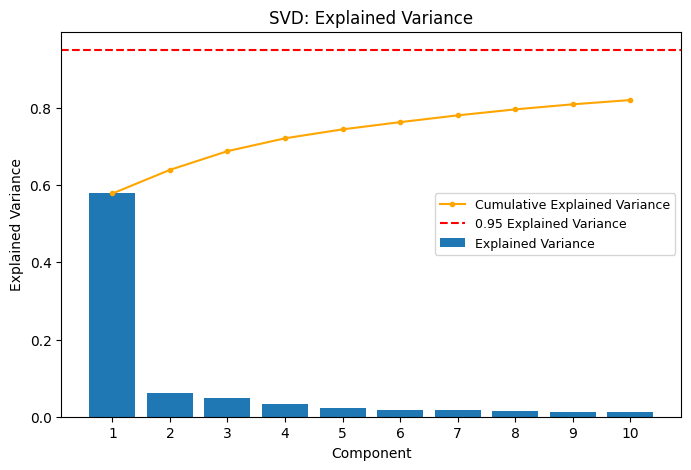

In [16]:
# Getting explained variance ratio from the lda model 
evr = svd.explained_variance_ratio_
components = range(1, len(evr) + 1)

# Plotting scree plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x=components, height=evr, label='Explained Variance')
plt.plot(components, np.cumsum(evr), marker='.', color='orange', label='Cumulative Explained Variance')
plt.axhline(y=.95, color='r', linestyle='--', label='0.95 Explained Variance')
plt.xticks(range(1, len(evr) + 1))
plt.title('SVD: Explained Variance')
plt.xlabel('Component')
plt.ylabel('Explained Variance')
plt.legend(fontsize=9)

# Show the plot
plt.show()


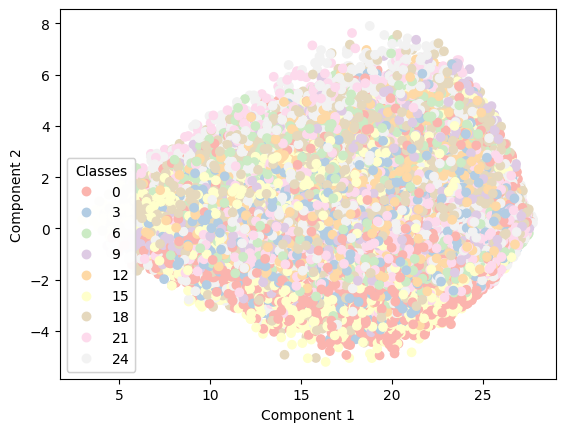

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Define the color map
cmap = plt.get_cmap('Pastel1')

# Perform SVD on the training data
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train)

# Visualize the data after SVD
fig, ax = plt.subplots()
scatter = ax.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, cmap=cmap)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend)
plt.show()


In [18]:
#fit on training data and transform
X_train = svd.fit_transform(X_train,y_train)
X_test = svd.transform(X_test)

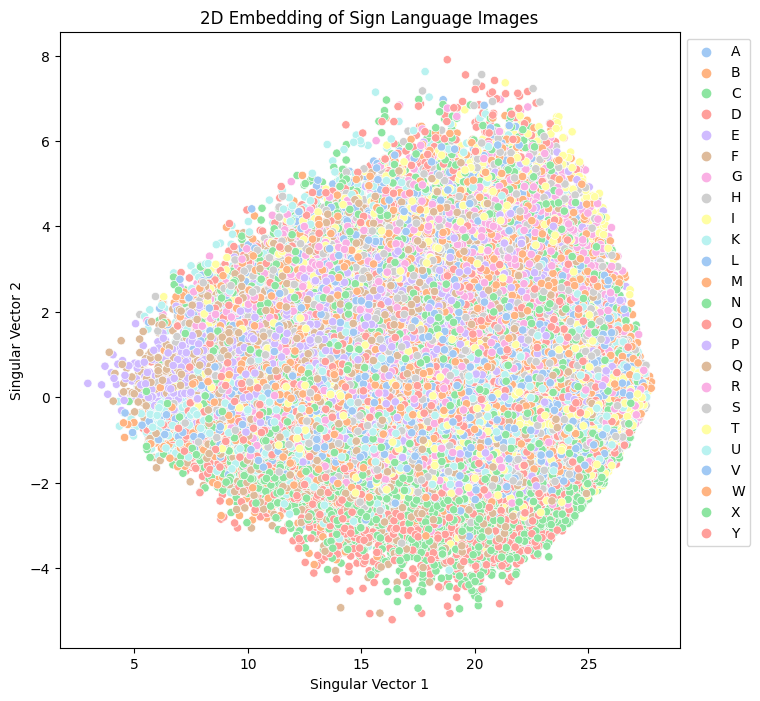

In [20]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue = y_train, palette = 'pastel');
handler, _ = ax.get_legend_handles_labels();
plt.legend(handler, letters, bbox_to_anchor = (1, 1));
plt.title('2D Embedding of Sign Language Images')
plt.xlabel('Singular Vector 1');
plt.ylabel('Singular Vector 2');

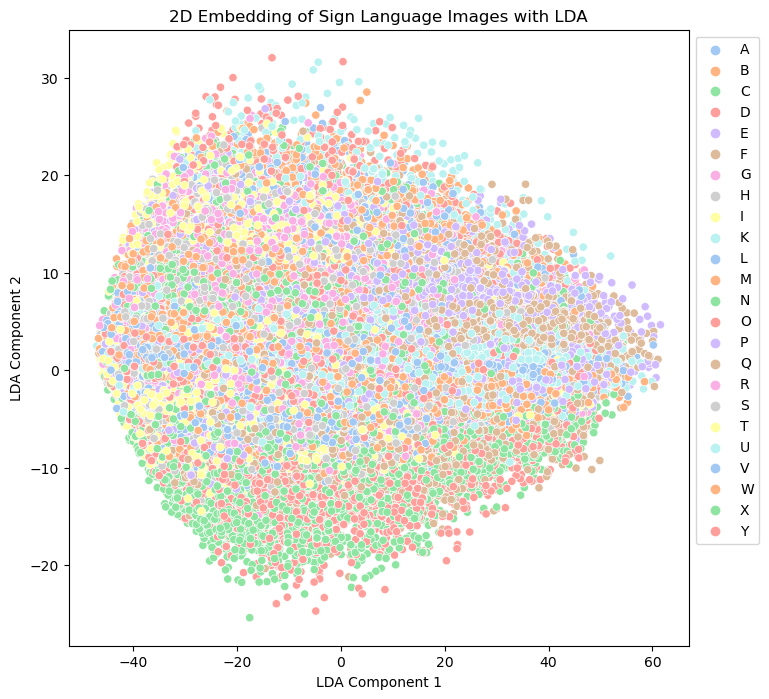

In [ ]:
# Set figure size
fig, ax = plt.subplots(figsize=(8, 8))

# Create scatterplot with LDA components as x and y coordinates, and class labels as color
sns.scatterplot(x=X_train_svd[:, 0], y=X_train_svd[:, 1], hue=y_train, palette=sns.color_palette("pastel", n_colors=len(letters)), ax=ax)

# Add legend with class labels
handler, _ = ax.get_legend_handles_labels()
plt.legend(handler, letters, bbox_to_anchor=(1, 1))

# Add title and axis labels
plt.title('2D Embedding of Sign Language Images with LDA')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')

# Show plot
plt.show()
